# Decision Trees & Random Forests

* In this notebook, we take a look at the intuition behind ID-3 Algorithm, and how it extends to Random Forests. In any Classification, Regression task, I personally use Decision tree algorithm as a first attempt to understand important features in a given dataset. 
* Before we start coding a decision tree, we need to understand the concept of Entropy, in Information theory. Decision trees are non-parametric (the model makes no assumptions, unlike many other traditional method, and makes most Intuitive sense in visualizing it !)

### Entropy
* The formal definition of entropy is as follows: H(x) is the expected number of bits needed to encode randomly drawn value of X.

$$ H(x) =-\sum _{i}P_{i}\log {P_{i}} $$

* To put simply, entropy conveys the impurity of a set/ vector. We know for a fair coin, probability of heads = 0.5. For 1000 random trials, we would get highest Pmf values at 0.5 (According to law of large numbers), hence, it has the more impurity (equally likely to be heads or tails).

* For a biased coin (say probability of heads = 0.9, the impurity is much lesser, when compared to an unbiased coin), hence, would have lesser entropy.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# function to return Entropy
def EntropyCoin(p_heads):
    p_tails = 1 - p_heads
    return  -(p_heads*math.log2(p_heads) + p_tails*math.log2(p_tails))

In [2]:
# Iterating through probability of heads
    
entropy_val = [EntropyCoin(i) for i in np.arange(0.0001,0.9999,0.01)]

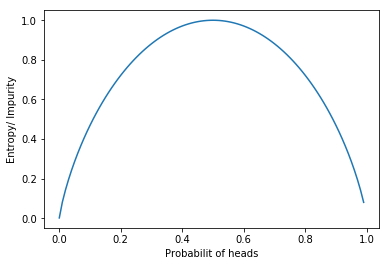

In [3]:
plt.ylabel('Entropy/ Impurity')
plt.xlabel('Probabilit of heads')
plt.plot(np.arange(0.0001,0.9999,0.01), entropy_val)

* Above, we see that Entropy = 1, at p_heads = p_tails = 0.5 (Highest impurity), whereas p_heads = 0 and p_heads = 1, has least impurity.

#### Specific Conditional Entropy, Conditional Entropy & Information Gain

* Entropy can be conditioned across different categories of an attribute, and specific conditional entropy can be calculated.

* Conditional Entropy is the weighted average of specific conditional entropy various categories by the probability of their occurances. 

* The difference between the Entropy of the base attribute and the conditional entropy is the Information Gain (basically describes if we gain more information by using the next attribute, and we would use an attribute which maximizes Information gain). This concept is sufficient to develop an Industrial level Classifier/ Regressor, along with the ID3-algorithm.

* For example, let us consider the following dataset, we calculate the specific entropy, conditional entropy and Information gain to decide the best-attribute to help classify if the playground is open today.

In [4]:
# The task is to generate a decision tree to help classify if it is going to rain or not.

df = pd.DataFrame()
df['rainy'] = ['yes','yes','yes','no','no']
df['sunny'] = ['no','no','yes','yes','no']
df['is_open'] = [0, 0, 0, 1, 1]
df

,rainy,sunny,is_open
0,yes,no,0
1,yes,no,0
2,yes,yes,0
3,no,yes,1
4,no,no,1


* We can use either the rainy or sunny attribute to classify a new data-point, first lets calculate the Class-Entropy. Of the 5 rows, we have the playground open 3 times, and closed 2 times. Hence, class entropy is 

$$ - [(3/5)*log2(3/5) + (2/5)*log2(2/5)] = 0.97 $$

* Hence, we can say the the data-set is impure (almost = 1), meaning we have almost equal number of data-points in either of the classes. Now, let us decide on which attribute to use for classifying our points; we have two attributes at hand, let us start by calculating the Specific Entropy of each attribute.

<img src="decisiontree/1.png">
<img src="decisiontree/2.png">

* We have the specific conditional probabilities for each of the attributes, and we can now calculate the Conditional probability of each of the attributes. 

$$ H(rainy: yes) = 0, H(rainy: no) = 0 $$

$$ H(sunny: yes) = 1, H(sunny: no) = 0.91 $$

* Conditional Entropy for attribute rainy:

$$ H(rainy)  =  - [ P(rainy: yes)*H(rainy: yes) + P(rainy: no)*H(rainy: no)] $$

$$ H(rainy)  =  - [(3/5)*(0) + (2/5)*(0)] = 0 $$

* Conditional Entropy for attribute sunny:

$$ H(sunny)  =  - [ P(sunny: yes)*H(sunny: yes) + P(sunny: no)*H(sunny: no)] $$

$$ H(sunny)  =  - [(2/5)*(1) + (3/5)*(0.91)] = 0.946 $$

* Now, we can calculate Information Gain for each of the attributes:

$$ InfoGain(rainy) = ClassEntropy - H(rainy) = 0.97 - 0.0 = 0.97 $$

$$ InfoGain(sunny) = ClassEntropy - H(sunny) = 0.97 - 0.946 = 0.024 $$


* Of the two information attributes above, we should use the 'rainy' attribute to split our decision tree first, followed by 'sunny' attribute.

In [28]:
df = pd.DataFrame()
df['rainy'] = [1,1,1,0,0]
df['sunny'] = [0,0,1,1,0]
df['is_open'] = [0, 0, 0, 1, 1]
df

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf = dt_clf.fit(df[['rainy','sunny']], df.is_open)

In [29]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

* Below is the final Decision Tree Classifier which includes set of rules to classify the data. The only condition which matters is wether it is rainy or not. If it is not rainy, the playground if open, else the play-ground is closed. Note that there is no influence of the second attribute (sunny), whatsoever. 

* Hence, observe the feature importance of the two attributes. 

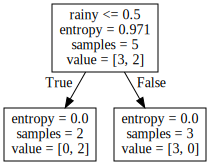

In [48]:
from graphviz import Source
Source(tree.export_graphviz(dt_clf, out_file=None, feature_names=df[['rainy','sunny']].columns))

In [49]:
# we can see the importance of features in our classifier, 
# and attribute sunny has no influence at all.

dt_clf.feature_importances_

array([1., 0.])